# Données de l’OFSP sur le covid

L’OFSP actualise quotidiennement plusieurs tableaux de données sur le covid, listés [dans cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html). On va se plonger dans le premier.


In [1]:
import pandas as pd

# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques dans le notebook directement
%matplotlib inline

In [ ]:
# on charge le fichier CSV directement sur le site de l’OFSP
# !! plus disponible !!
df = pd.read_excel(
    "https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_base%20de%20donn%C3%A9es_graphiques_COVID-19-rapport.xlsx",
    skiprows=6,
)

## Sélectionner les lignes de tant à tant

En Python, on peut découper une liste pour extraire les éléments de tel à tel index.

Exemple:


In [ ]:
maliste = ["un", "deux", "trois", "quatre", "cinq", "six"]

In [5]:
# Du 2e au 4e élément – mais comme toujours, la numérotation commence à zéro
maliste[1:4]

['deux', 'trois', 'quatre']

In [6]:
# Elements à partir du 3ème
maliste[2:]

['trois', 'quatre', 'cinq', 'six']

In [7]:
# Trois derniers éléments
maliste[-3:]

['quatre', 'cinq', 'six']

### Dans Pandas

On peut faire pareil pour les lignes de notre tableau


In [32]:
# Index 5 et 6
df[5:7]

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
5,2020-02-29,13,45,14,42,NaN,NaN
6,2020-03-01,11,56,10,52,NaN,NaN


In [33]:
# Les deux dernières lignes
df[-2:]

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
471,2021-06-09,233,699695,2,28851,2.0,10301.0
472,2021-06-10,2,699697,0,28851,0.0,10301.0


## Une date comme index

On indique à Python de construire l’index à partir de la colonne **date**:


In [ ]:
# D’abord, on convertit la date
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Ensuite, on en fait notre index. N’oubliez pas inplace=True!
df.set_index(df["Date"], inplace=True)

In [36]:
# Et voilà à quoi ça ressemble!
df.head()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-02-24,2020-02-24,1,1,5,5,NaN,NaN
2020-02-25,2020-02-25,1,2,4,9,NaN,NaN
2020-02-26,2020-02-26,10,12,9,18,NaN,NaN
2020-02-27,2020-02-27,10,22,5,23,NaN,NaN
2020-02-28,2020-02-28,10,32,5,28,NaN,NaN


## Sélectionner par date

C’est le même principe que plus haut!


In [ ]:
# On peut cibler des données de telle à telle date, puis faire la somme
df["2020-02-28":"2020-03-16"]["Nombre de cas"].sum()

3753

In [ ]:
# Ou prendre les données dès / jusqu’à telle date
df["2020-03-16":]["Nombre de cas"].sum()

696987

In [ ]:
# Ou encore prendre un mois entier, avec .loc
# J’ai pris 5 lignes au hasard pour ne pas prendre tout votre écran
df.loc["2020-03"].sample(5)

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-03-07,2020-03-07,49,365,8,146,0.0,2.0
2020-03-18,2020-03-18,1214,6077,112,843,8.0,55.0
2020-03-28,2020-03-28,723,16231,123,2391,57.0,335.0
2020-03-05,2020-03-05,62,243,18,114,2.0,2.0
2020-03-15,2020-03-15,329,2710,56,513,8.0,28.0


In [ ]:
df[:"2020-09-02"].tail()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-08-29,2020-08-29,216,42213,2,4511,0.0,1768.0
2020-08-30,2020-08-30,144,42357,7,4518,1.0,1769.0
2020-08-31,2020-08-31,347,42704,9,4527,1.0,1770.0
2020-09-01,2020-09-01,364,43068,11,4538,1.0,1771.0
2020-09-02,2020-09-02,417,43485,11,4549,3.0,1774.0


# Passons aux graphiques!

Matplotlib est un module Python très puissant pour les graphiques.

Mais il est aussi très «bas niveau». Vous pouvez tout faire, mais vous devez un peu tout lui dire.

Google et StackOverflow sont vos amis...


In [ ]:
plt.style.use("fivethirtyeight")

<AxesSubplot:xlabel='Date'>

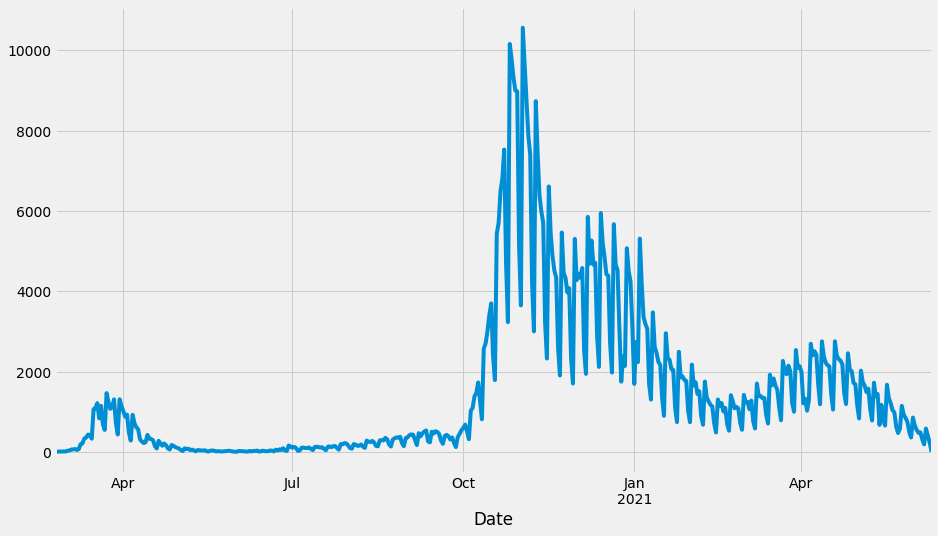

In [ ]:
# Le nombre de cas quotidien
df["Nombre de cas"].plot(figsize=(14, 8))

<AxesSubplot:>

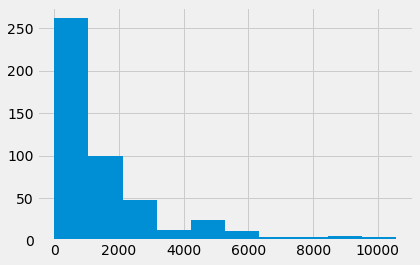

In [ ]:
# Un histogramme, pour voir comment les données sont distribuées
df["Nombre de cas"].hist(bins=10)

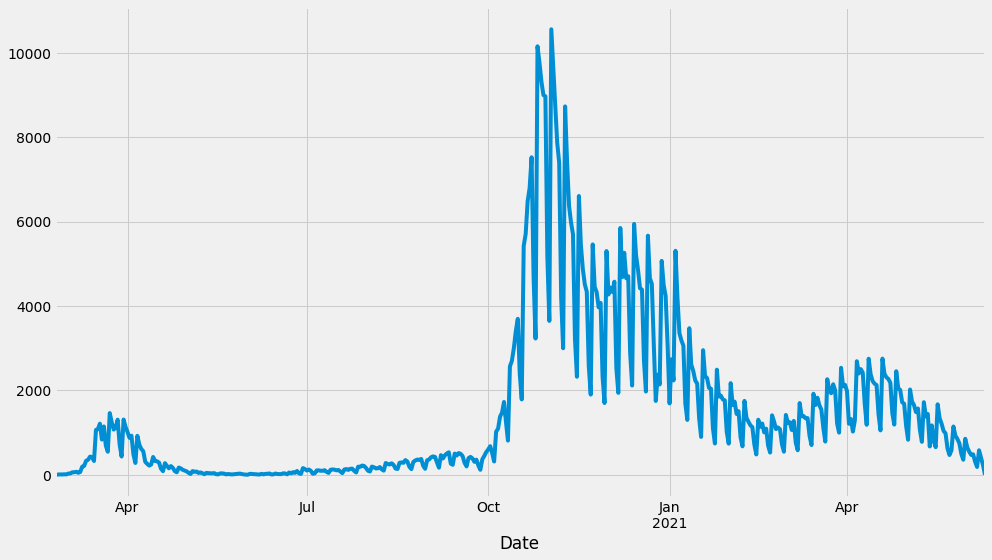

In [ ]:
# Et si on veut exporter notre graphique en PDF, pour le retravailler?
df["Nombre de cas"].plot(kind="line", figsize=(14, 8))
plt.tight_layout()
plt.savefig("export_graphique.pdf")

## Moyenne mobile = rolling average

Les données du covid sont très fortement influencées par les jours de la semaine, avec des creux chaque week-end.

Elles prennent plus de sens soit quand on les regroupe par semaine, soit avec une moyenne mobile sur 7 jours:


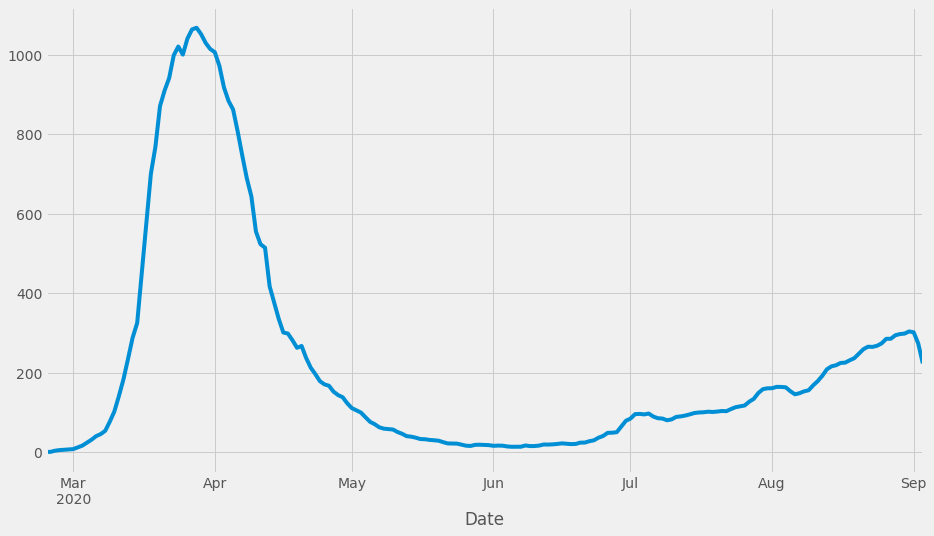

In [ ]:
df["Nombre de cas"].rolling("7d").mean().plot(figsize=(14, 8))

In [ ]:
# Calculer la somme hebdomadaire.
# Comme nos semaines commencent le lundi, on glisse un "loffset" (left offset) d’un jour.
df["Nombre de cas"].resample("W", label="left", loffset=pd.DateOffset(days=1)).sum()

Date
2020-02-24      56
2020-03-02     378
2020-03-09    2276
2020-03-16    6589
2020-03-23    7362
2020-03-30    6036
2020-04-06    3602
2020-04-13    1840
2020-04-20    1171
2020-04-27     699
2020-05-04     401
2020-05-11     230
2020-05-18     153
2020-05-25     126
2020-06-01      98
2020-06-08     140
2020-06-15     171
2020-06-22     354
2020-06-29     682
2020-07-06     632
2020-07-13     710
2020-07-20     824
2020-07-27    1152
2020-08-03    1092
2020-08-10    1573
2020-08-17    1856
2020-08-24    2090
2020-08-31     834
Freq: W-MON, Name: Nombre de cas, dtype: int64

## Exercice

Pouvez-vous compléter ces données avec le nombre de tests par jour, également publié par l’OFSP [sur cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html)?

Et lui appliquer également une moyenne mobile?


## Pour terminer

On peut exporter le résultat tout joli, avec moyenne mobile, vers datawrapper.

Sélectionnez les colonnes et les dates qui vous intéressent, puis essayez un `to_excel('nom-du-fichier.xlsx')` ou `to_csv('nom-du-fichier.csv')`...
